#### 1. Librerías

In [305]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Import onehotencoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
#!pip install pydot
import pydot

# Save model / deployment
import pickle
import sys

# Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#### 2. Datos

In [306]:
# Carga de datos
df = pd.read_csv('../../Data/processed/delitos_mvd_final_sin_vd.csv')

In [307]:
# Visualización de los primeros registros
df.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
COUNT_DELITOS,1,1,6,1,4


In [308]:
# Transformación de la variable objetivo a binaria
df['RIESGO'] = df['RIESGO'].apply(lambda x: 1 if x == 'Alto' else 0)

In [309]:
#CHequeo de transformación
df['RIESGO'].value_counts()

RIESGO
0    181017
1     60626
Name: count, dtype: int64

In [310]:
# Nombre de las variables
df.columns

Index(['BARRIO_MONTEVIDEO', 'FECHA', 'AÑO', 'MES', 'DIA_MES', 'DIA_SEMANA',
       'SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'COUNT_DELITOS', 'POBLACION',
       'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'TEMPMIN', 'TEMP',
       'FEELSLIKEMAX', 'FEELSLIKEMIN', 'FEELSLIKE', 'HUMIDITY', 'PRECIP',
       'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY', 'SEVERERISK',
       'CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
       'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO',
       'NO_LABORABLE', 'NOMBRE_FESTIVO', 'COUNT_DELITOS_NORM', 'RIESGO'],
      dtype='object')

In [311]:
# Selección de variables para modelar
df_red = df[['BARRIO_MONTEVIDEO', 'MES', 'DIA_MES', 'DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE',
        'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP','WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY','CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
        'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO','NO_LABORABLE', 'NOMBRE_FESTIVO', 'RIESGO']].copy()

In [312]:
# Datos perdidos
df.isna().sum()

BARRIO_MONTEVIDEO               0
FECHA                           0
AÑO                             0
MES                             0
DIA_MES                         0
DIA_SEMANA                      0
SEMANA_MES                      0
SEMESTRE                        0
TRIMESTRE                       0
COUNT_DELITOS                   0
POBLACION                       0
TURISTICO                       0
MUNICIPIO                       0
PLAYA                           0
INSE                            0
TEMPMAX                         0
TEMPMIN                         0
TEMP                            0
FEELSLIKEMAX                    0
FEELSLIKEMIN                    0
FEELSLIKE                       0
HUMIDITY                        0
PRECIP                          0
WINDGUST                    38059
WINDSPEED                       0
SEALEVELPRESSURE                0
VISIBILITY                      0
SEVERERISK                      0
CONDITIONCLEAR                  0
CONDITIONPARTI

In [313]:
# Asignamos valor de WINDSPEED a datos nulos de WINDGUST
df_red['WINDGUST'] = df_red['WINDGUST'].fillna(df_red['WINDSPEED'])

In [314]:
# Chequeo
df_red.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
TURISTICO,0,0,0,0,0
MUNICIPIO,C,C,C,C,C
PLAYA,NO,NO,NO,NO,NO


- Muestreo del dataset para optimización de tiempos de entrenamiento

In [315]:
'''
# Definir la fracción de la muestra de cada barrio
sample_frac = 0.3

# Muestrear los datos dentro de cada barrio
df_red_sample = df_red.groupby("BARRIO_MONTEVIDEO", group_keys=False).apply(
    lambda x: x.sample(frac=sample_frac, random_state=42)
).reset_index(drop=True)

# Verificar la cantidad de datos por barrio en la muestra
print(df_red_sample["BARRIO_MONTEVIDEO"].value_counts(normalize=True))
'''

'\n# Definir la fracción de la muestra de cada barrio\nsample_frac = 0.3\n\n# Muestrear los datos dentro de cada barrio\ndf_red_sample = df_red.groupby("BARRIO_MONTEVIDEO", group_keys=False).apply(\n    lambda x: x.sample(frac=sample_frac, random_state=42)\n).reset_index(drop=True)\n\n# Verificar la cantidad de datos por barrio en la muestra\nprint(df_red_sample["BARRIO_MONTEVIDEO"].value_counts(normalize=True))\n'

#### 3. Separación en training y test dataset

In [316]:
# Defincicón de objetivo
X = df_red.drop('RIESGO', axis=1)
y = df_red['RIESGO']

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=None)


In [317]:
# Chequeamos la el tamaño de los datos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(169150, 27)
(72493, 27)
(169150,)
(72493,)


#### 4. Feature encoding y scaling

##### 4.1. Definición de Encoders

- Definicion de variables para encoding

In [318]:
# Definición de variables categóricas para one hot-encoding
one_hot_columns = ['DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'PLAYA', 'WINDIRCAT', 'SEVERERISKCAT', 'NO_LABORABLE']

# Definición de variables numéricas para estandarización
continuous_columns = ['INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP', 'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY', 'TASA_DESEMPLEO']

# Definición de variables para target encoding
targ_enc_columns = ['BARRIO_MONTEVIDEO', 'DIA_MES', 'MES' , 'MUNICIPIO', 'NOMBRE_FESTIVO']

- One hot Encoding

In [319]:
from category_encoders.one_hot import OneHotEncoder

# Function to apply One-Hot Encoding to the specified categorical columns.
def apply_one_hot_encoding(X_train, X_test, categorical_columns):
    """
    Apply One-Hot Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - categorical_columns: list, list of categorical columns to encode.

    Returns:
    - X_train_encoded: DataFrame, the training dataset with One-Hot Encoded columns.
    - X_test_encoded: DataFrame, the testing dataset with One-Hot Encoded columns.
    - encoder: Fitted OneHotEncoder instance from category_encoders.
    """
    # Initialize the OneHotEncoder from category_encoders
    encoder = OneHotEncoder(cols=categorical_columns, use_cat_names=True)

    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Transform the testing set using the same encoder
    X_test_encoded = encoder.transform(X_test)

    return X_train_encoded, X_test_encoded, encoder

- Standard Scaling Encoding

In [320]:
# Function to apply Standard Scaling to the specified numerical columns.
def apply_scaling(X_train, X_test, scale_columns):
    """
    Apply Standard Scaling to the specified numerical columns.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - scale_columns: list, list of numerical columns to scale.

    Returns:
    - X_train_scaled: DataFrame, the training dataset with scaled columns.
    - X_test_scaled: DataFrame, the testing dataset with scaled columns.
    - scaler: Fitted StandardScaler instance.
    """
    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Fit the scaler on the training set and transform
    X_train_scaled = X_train.copy()
    X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])

    # Transform the testing set using the same scaler
    X_test_scaled = X_test.copy()
    X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

    return X_train_scaled, X_test_scaled, scaler

- Target Encoding

In [321]:
# Function to apply Target encoding to the specified categorical columns.
from category_encoders.target_encoder import TargetEncoder

def apply_target_encoding(X_train, y_train, X_test, target_columns):
    """
    Apply Target Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - target_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with Target-encoded columns.
    - X_test_transformed: DataFrame, the testing dataset with Target-encoded columns.
    - target_encoder: Fitted TargetEncoder instance.
    """
    # Initialize the Target encoder
    target_encoder = TargetEncoder(cols=target_columns)

    # Fit and transform the training set
    X_train_transformed = target_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = target_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, target_encoder

- Función para aplicar el encoding

In [322]:
# Function to transform Train and Test data using the defined encoders

def encoding_data (X_train, y_train, X_test):
    """
    Transforms Train and Test datasets by applying WOE encoding, Target encoding, 
    Standard scaling, and One-Hot encoding.
    
    Parameters:
    - X_train: DataFrame, training features.
    - y_train: Series/DataFrame, target variable for training.
    - X_test: DataFrame, testing features.
    
    Returns:
    - X_train_enc: Transformed training dataset.
    - X_test_enc: Transformed testing dataset.
    - woe_encoder, target_encoder, scaler, one_hot_encoder: Fitted encoders and scaler.
    """
    
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()

    
    
    # Applying Target encoding
    X_train_enc, X_test_enc, target_encoder = apply_target_encoding(X_train_enc, y_train, X_test_enc, targ_enc_columns)
    
    # Applying Standard Scaling
    X_train_enc, X_test_enc, scaler = apply_scaling(X_train_enc, X_test_enc, continuous_columns)
    
    # Applying One-hot encoding
    X_train_enc, X_test_enc, one_hot_encoder = apply_one_hot_encoding(X_train_enc, X_test_enc, one_hot_columns)
    
    return X_train_enc, X_test_enc

##### 4.2. Aplicando Encoding a Training y Test dataset

In [327]:
# Encoding de Train y Test
X_train_enc, X_test_enc = encoding_data(X_train, y_train, X_test)

In [328]:
# Chequeo de Train transformado
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169150 entries, 13005 to 121958
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BARRIO_MONTEVIDEO          169150 non-null  float64
 1   MES                        169150 non-null  float64
 2   DIA_MES                    169150 non-null  float64
 3   DIA_SEMANA_JUEVES          169150 non-null  int64  
 4   DIA_SEMANA_VIERNES         169150 non-null  int64  
 5   DIA_SEMANA_SABADO          169150 non-null  int64  
 6   DIA_SEMANA_DOMINGO         169150 non-null  int64  
 7   DIA_SEMANA_LUNES           169150 non-null  int64  
 8   DIA_SEMANA_MARTES          169150 non-null  int64  
 9   DIA_SEMANA_MIERCOLES       169150 non-null  int64  
 10  SEMANA_MES_3.0             169150 non-null  int64  
 11  SEMANA_MES_4.0             169150 non-null  int64  
 12  SEMANA_MES_2.0             169150 non-null  int64  
 13  SEMANA_MES_1.0             169

In [323]:
X_train_enc.head().T

,3043,207896,202209,64752,18064
BARRIO_MONTEVIDEO,0.295510,0.196349,0.256372,0.283019,0.357121
MES,0.253142,0.242432,0.242432,0.240653,0.277214
DIA_MES,0.252090,0.238178,0.257232,0.246560,0.254139
DIA_SEMANA_VIERNES,1.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_MARTES,0.000000,1.000000,0.000000,1.000000,0.000000
DIA_SEMANA_SABADO,0.000000,0.000000,1.000000,0.000000,0.000000
DIA_SEMANA_MIERCOLES,0.000000,0.000000,0.000000,0.000000,1.000000
DIA_SEMANA_JUEVES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_LUNES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_DOMINGO,0.000000,0.000000,0.000000,0.000000,0.000000


#### 5. Funciónes

##### 5.1. Función para cáculo de métricas

In [190]:
# Función para calcular métricas de evaluación de modelos

def compute_metrics(model, X_train, y_train, X_test, y_test, trh=0.5):
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    y_pred_train = (y_pred_proba_train >= trh).astype(bool)
    y_pred_test = (y_pred_proba_test >= trh).astype(bool)

    # Calcular curva ROC
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_train)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_test)

    # Matriz de confusión para Train
    tn_train, fp_train, fn_train, tp_train = metrics.confusion_matrix(y_train, y_pred_train).ravel()
    specificity_train = tn_train / (tn_train + fp_train)

    # Matriz de confusión para Test
    tn_test, fp_test, fn_test, tp_test = metrics.confusion_matrix(y_test, y_pred_test).ravel()
    specificity_test = tn_test / (tn_test + fp_test)

    # Imprimir métricas para Train
    print('Train results:')
    print(f"{model.__class__.__name__} Accuracy (Train): {metrics.accuracy_score(y_train, y_pred_train):.3f}")
    print(f"{model.__class__.__name__} AUC (Train): {metrics.auc(fpr_train, tpr_train):.3f}")
    print(f"{model.__class__.__name__} Recall (Train): {metrics.recall_score(y_train, y_pred_train):.3f}")
    print(f"{model.__class__.__name__} Specificity (Train): {specificity_train:.3f}")
    print(f"{model.__class__.__name__} F1-score (Train): {metrics.f1_score(y_train, y_pred_train):.3f}")


    # Imprimir métricas para Test
    print('Test results:')
    print(f"{model.__class__.__name__} Accuracy (Test): {metrics.accuracy_score(y_test, y_pred_test):.3f}")
    print(f"{model.__class__.__name__} AUC (Test): {metrics.auc(fpr_test, tpr_test):.3f}")
    print(f"{model.__class__.__name__} Recall (Test): {metrics.recall_score(y_test, y_pred_test):.3f}")
    print(f"{model.__class__.__name__} Specificity (Test): {specificity_test:.3f}")
    print(f"{model.__class__.__name__} F1-score (Test): {metrics.f1_score(y_test, y_pred_test):.3f}")

    
    # Crear curva ROC
    plt.figure(figsize=(4, 4))
    plt.plot(fpr_train, tpr_train, '-r')
    plt.plot(fpr_test, tpr_test, '-b')
    plt.plot([0, 1], ls="--")
    plt.legend(['Train', 'Test'])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Mostrar matrices de confusión como gráficos de calor
    fig, axes = plt.subplots(1, 2, figsize=(12, 1))
    
    # Matriz de confusión para Train
    sns.heatmap(metrics.confusion_matrix(y_train, y_pred_train), annot=True, fmt="d", cmap="Reds", ax=axes[0])
    axes[0].set_title("Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    # Matriz de confusión para Test
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title("Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    plt.show()


#### 6. Modelado

Train results:
DecisionTreeClassifier Accuracy (Train): 1.000
DecisionTreeClassifier AUC (Train): 1.000
DecisionTreeClassifier Recall (Train): 1.000
DecisionTreeClassifier Specificity (Train): 1.000
DecisionTreeClassifier F1-score (Train): 1.000
Test results:
DecisionTreeClassifier Accuracy (Test): 0.686
DecisionTreeClassifier AUC (Test): 0.579
DecisionTreeClassifier Recall (Test): 0.365
DecisionTreeClassifier Specificity (Test): 0.793
DecisionTreeClassifier F1-score (Test): 0.367


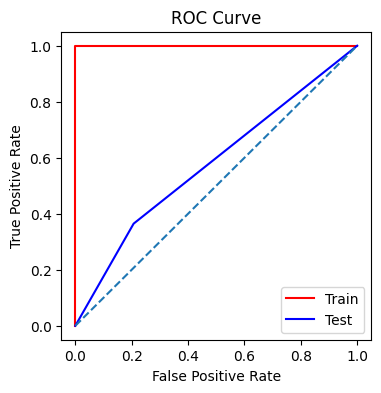

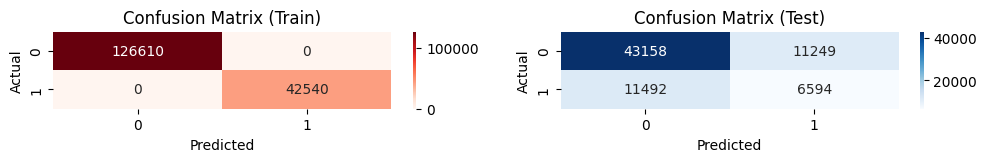

In [329]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(model_dt_1, X_train_enc, y_train, X_test_enc, y_test)

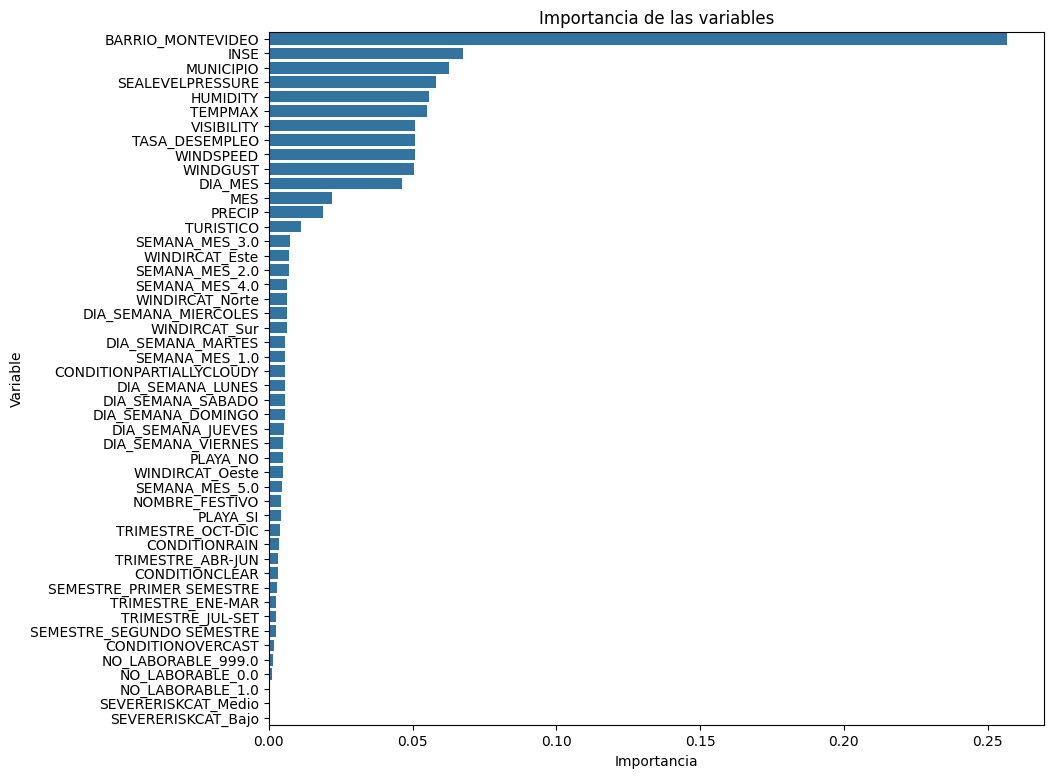

In [330]:
# Obtener la importancia de las variables
importancias = model_dt_1.feature_importances_
variables = X_train_enc.columns

# Graficar importancia de las variables ordenadas
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x='Importancia', y='Variable', data=df_importancia)
plt.title('Importancia de las variables')
plt.show()

top_n = 15  # Número de variables a conservar
top_variables = df_importancia.iloc[:top_n]['Variable'].values

# Redefinir dataset con menos variables
X_train_reducido = X_train_enc[top_variables]
X_test_reducido = X_test_enc[top_variables]

- El grafico de abajo es usando todo el dataset, las importancias son prácticamente iguales

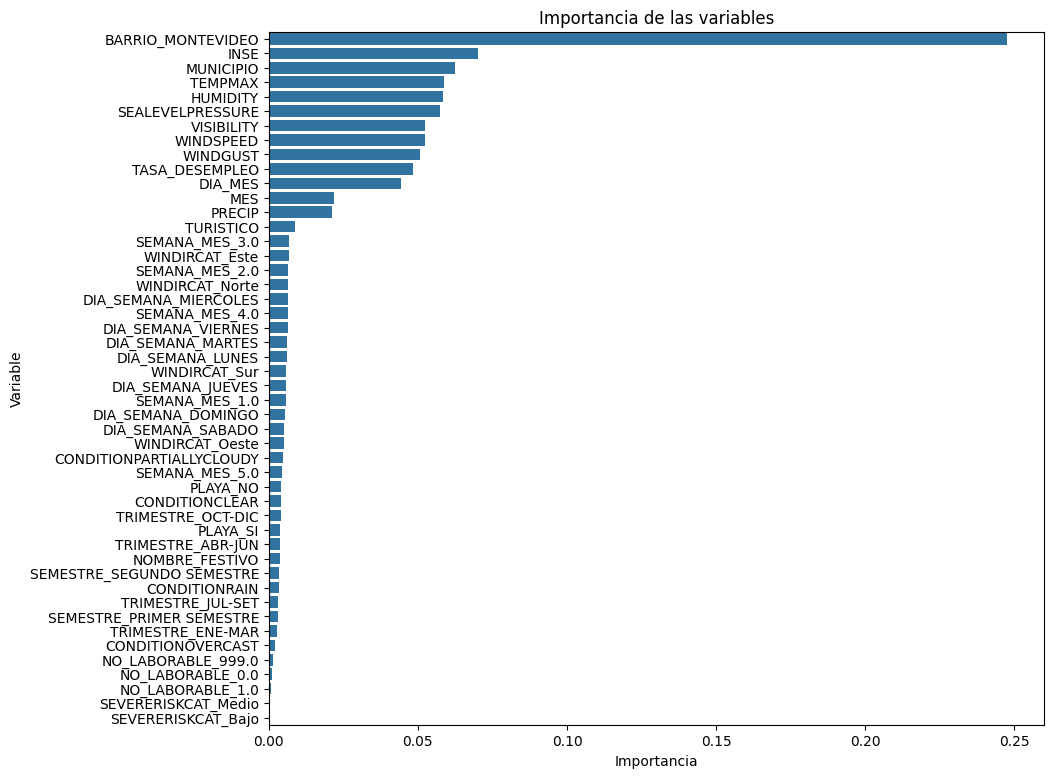

##### 6.1. Regresión Logística

Train results:
LogisticRegression Accuracy (Train): 0.697
LogisticRegression AUC (Train): 0.736
LogisticRegression Recall (Train): 0.605
LogisticRegression Specificity (Train): 0.727
LogisticRegression F1-score (Train): 0.497
Test results:
LogisticRegression Accuracy (Test): 0.701
LogisticRegression AUC (Test): 0.737
LogisticRegression Recall (Test): 0.607
LogisticRegression Specificity (Test): 0.732
LogisticRegression F1-score (Test): 0.501


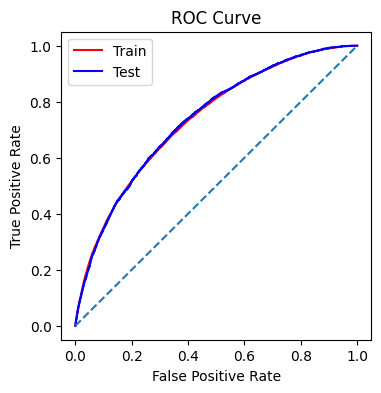

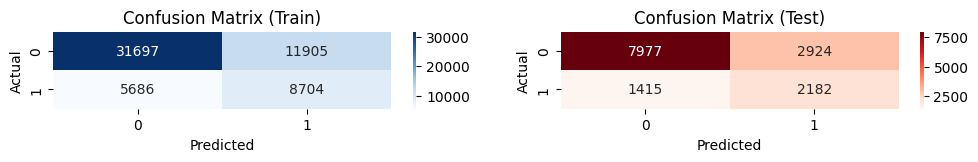

In [120]:
# Definir el modelo
model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
# Entrenar el modelo
model_rl_1.fit(X_train_enc, y_train)
# Calcular métricas
compute_metrics(model_rl_1, X_train_enc, y_train, X_test_enc, y_test)

- No es un buen modelo, F1 es muy bajo

**Ajuste de Hiperparámetos con GridSearch 1**

In [44]:
# LR Hyperparameter tuning 1 - GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'random_state': [42], 
    'class_weight': ['balanced']
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=2,  # Reduce the number of parallel jobs to avoid excessive memory usage
    verbose=2
)

# Fit the model
grid_search.fit(X_train_enc, y_train)


# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best F1 on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best F1 on validation: 0.3773184031134663


Train results:
LogisticRegression Accuracy (Train): 0.693
LogisticRegression AUC (Train): 0.731
LogisticRegression Recall (Train): 0.600
LogisticRegression Specificity (Train): 0.723
LogisticRegression F1-score (Train): 0.492
Test results:
LogisticRegression Accuracy (Test): 0.696
LogisticRegression AUC (Test): 0.733
LogisticRegression Recall (Test): 0.602
LogisticRegression Specificity (Test): 0.727
LogisticRegression F1-score (Test): 0.496


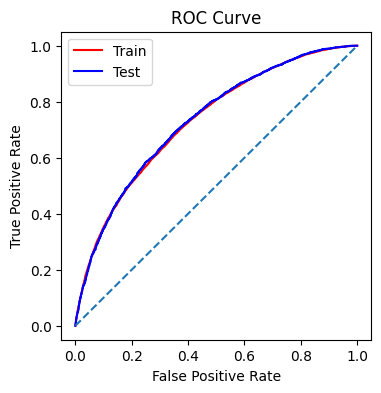

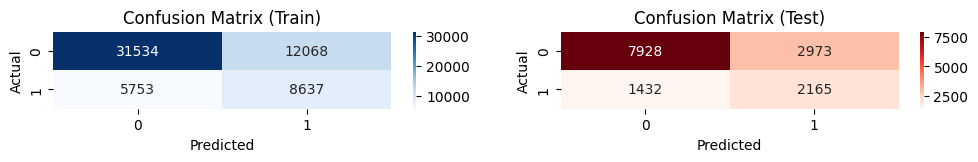

In [121]:
# Initialize the best model with the best hyperparameters
best_rl_model_1 = LogisticRegression(max_iter=1000, **best_params)

# Train the model
best_rl_model_1.fit(X_train_enc, y_train)

# Compute metrics of the best model
compute_metrics(best_rl_model_1, X_train_enc, y_train, X_test_enc, y_test)

#### 6.2. KNN

Train results:
KNeighborsClassifier Accuracy (Train): 1.000
KNeighborsClassifier AUC (Train): 1.000
KNeighborsClassifier Recall (Train): 1.000
KNeighborsClassifier Specificity (Train): 1.000
KNeighborsClassifier F1-score (Train): 1.000
Test results:
KNeighborsClassifier Accuracy (Test): 0.677
KNeighborsClassifier AUC (Test): 0.546
KNeighborsClassifier Recall (Test): 0.223
KNeighborsClassifier Specificity (Test): 0.827
KNeighborsClassifier F1-score (Test): 0.255


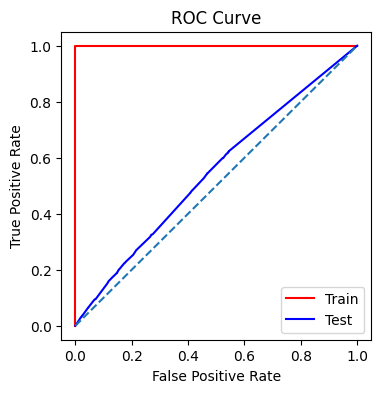

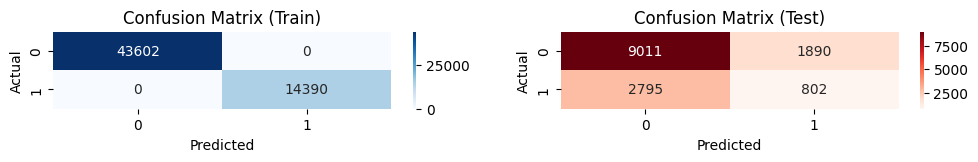

In [124]:
# Define model
knn_model1 = KNeighborsClassifier(n_neighbors=3,
                                metric= 'hamming',
                                weights = 'distance',
                                n_jobs=-1) # 'uniform')

# Train model

knn_model1.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(knn_model1, X_train_enc, y_train, X_test_enc, y_test, trh = 0.5)

**Optimización de Hiperparámetros con GridSearch 1**

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\usuario\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Train results:
GridSearchCV Accuracy (Train): 1.000
GridSearchCV AUC (Train): 1.000
GridSearchCV Recall (Train): 1.000
GridSearchCV Specificity (Train): 1.000
GridSearchCV F1-score (Train): 1.000
Test results:
GridSearchCV Accuracy (Test): 0.677
GridSearchCV AUC (Test): 0.573
GridSearchCV Recall (Test): 0.267
GridSearchCV Specificity (Test): 0.813
GridSearchCV F1-score (Test): 0.291


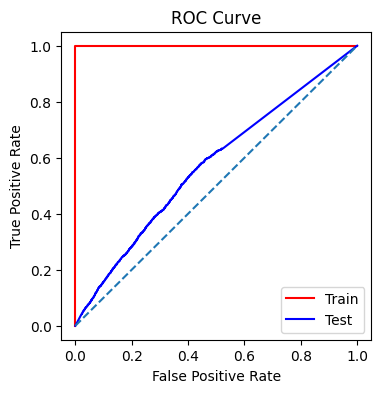

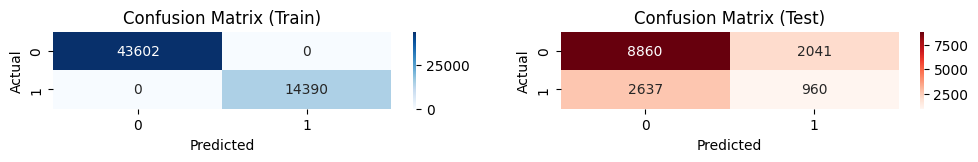

In [126]:
# KNN Hyperparameter tuning 1 - GridSearchCV 1

# Define hyperparameters
param_grid = {
    'n_neighbors': [3,5,10,15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)   

# Fit the model
grid_search.fit(X_train_enc, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Compute metrics of the best model
compute_metrics(grid_search, X_train_enc, y_train, X_test_enc, y_test, trh = 0.5)

# Save the best parameters
best_params = grid_search.best_params_

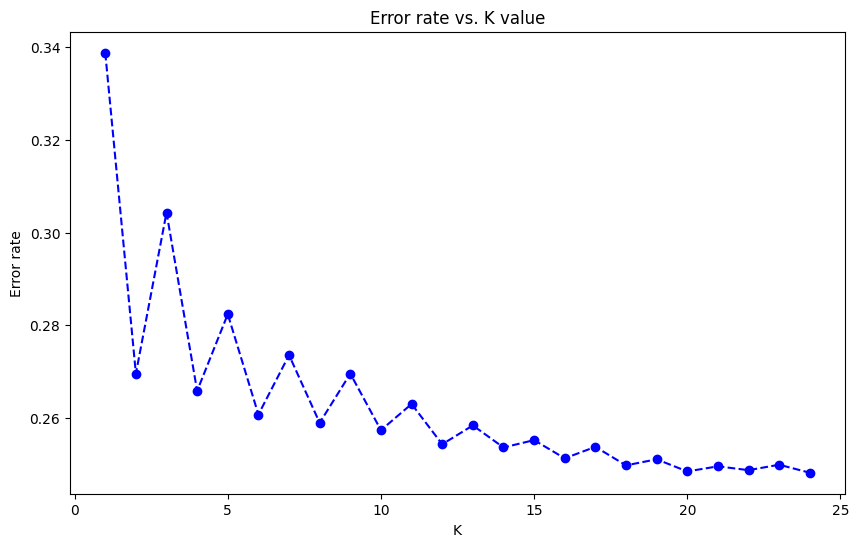

In [127]:
# Create a for loop that trains various KNN models and graph error rate vs. K value

error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i,
                            metric= 'euclidean',
                            weights = 'uniform',
                            n_jobs=-1)
    knn.fit(X_train_enc, y_train)

    pred_i = knn.predict(X_test_enc)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (10, 6))
plt.plot(range(1,25), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.title('Error rate vs. K value')
plt.show()

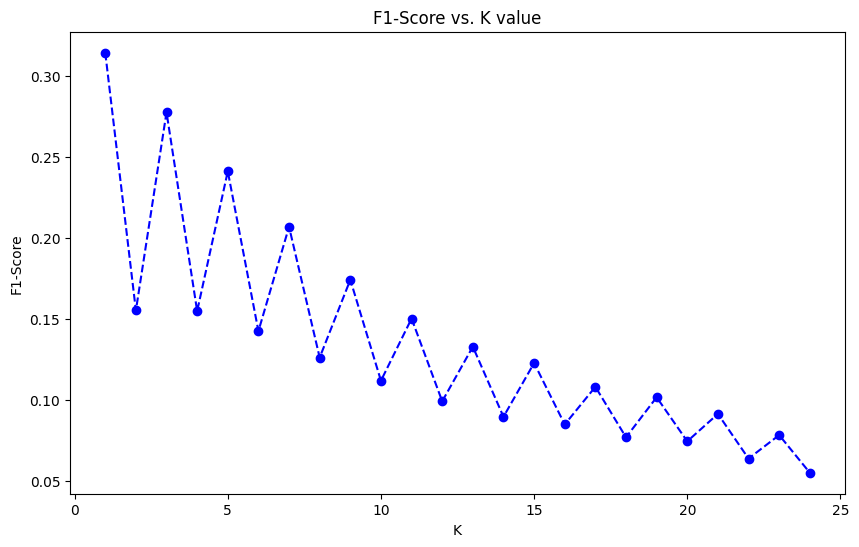

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

f1_scores = []

# Iterar sobre valores de K
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i,
                                metric='euclidean',
                                weights='uniform',
                                n_jobs=-1)
    
    knn.fit(X_train_enc, y_train)  # Entrenar modelo
    
    pred_i = knn.predict(X_test_enc)  # Predicción de clases
    
    # Calcular F1-Score y guardarlo en la lista
    f1_scores.append(f1_score(y_test, pred_i, average='binary'))  # 'binary' si es clasificación binaria

# Graficar F1-Score vs. K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1_scores, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. K value')
plt.show()


#### 6.3. Árbol de decisión

Train results:
DecisionTreeClassifier Accuracy (Train): 1.000
DecisionTreeClassifier AUC (Train): 1.000
DecisionTreeClassifier Recall (Train): 1.000
DecisionTreeClassifier Specificity (Train): 1.000
DecisionTreeClassifier F1-score (Train): 1.000
Test results:
DecisionTreeClassifier Accuracy (Test): 0.686
DecisionTreeClassifier AUC (Test): 0.579
DecisionTreeClassifier Recall (Test): 0.365
DecisionTreeClassifier Specificity (Test): 0.792
DecisionTreeClassifier F1-score (Test): 0.366


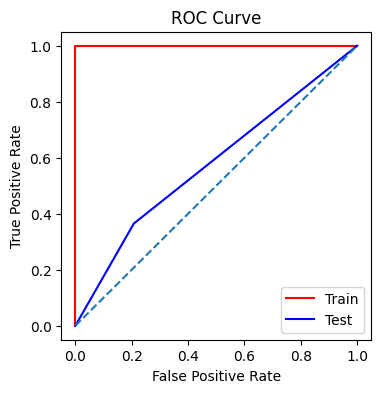

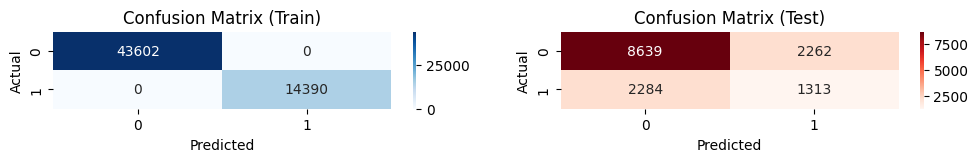

In [129]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(model_dt_1, X_train_enc, y_train, X_test_enc, y_test, trh = 0.5)

**Arbol de Decisión - Optimización de Hiperparámetros con GridSearch 1**

In [183]:
# GridSearchCV for Decision Tree

# Define hyperparameters
param_grid = {
    'max_depth': [3,4,5,6],
    'min_samples_split': [2, 4, 6,10,15],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'random_state': [1234],
    'class_weight': ['balanced']
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train_enc, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best F1 on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1234, 'splitter': 'random'}
Best F1 on validation: 0.6945100764419736


Train results:
DecisionTreeClassifier Accuracy (Train): 0.753
DecisionTreeClassifier AUC (Train): 0.709
DecisionTreeClassifier Recall (Train): 0.397
DecisionTreeClassifier Specificity (Train): 0.870
DecisionTreeClassifier F1-score (Train): 0.444
Test results:
DecisionTreeClassifier Accuracy (Test): 0.753
DecisionTreeClassifier AUC (Test): 0.709
DecisionTreeClassifier Recall (Test): 0.388
DecisionTreeClassifier Specificity (Test): 0.873
DecisionTreeClassifier F1-score (Test): 0.438


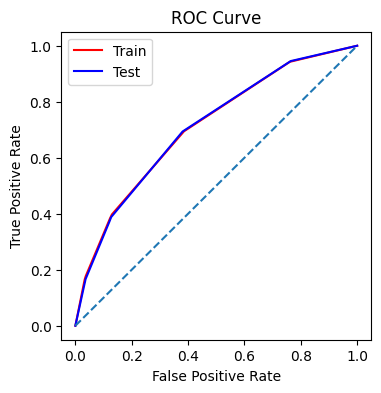

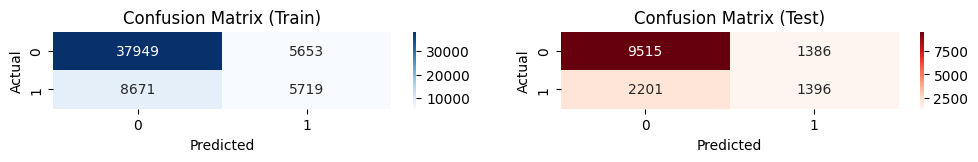

In [188]:
# Initialize the best model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)

# Train the model
best_dt_model.fit(X_train_enc, y_train)

# Compute metrics of the best model
compute_metrics(best_dt_model, X_train_enc, y_train, X_test_enc, y_test, trh = 0.6)


- Muy bajo Recall y F1

#### 6.4. Random Forest

In [324]:
# Definición del modelo Random Forest
model_rf_1 = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo
model_rf_1.fit(X_train_enc, y_train)

# Calcular métricas
compute_metrics(model_rf_1, X_train_enc, y_train, X_test_enc, y_test, trh = 0.5)

ValueError: Found input variables with inconsistent numbers of samples: [193314, 169150]

In [200]:
# GridSearchCV for Random Forest - 1

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [1234],
    'class_weight': ['balanced'],
    'n_jobs': [-1]    
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train_enc, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best F1 on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_



Fitting 5 folds for each of 972 candidates, totalling 4860 fits


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
511 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 1234}
Best F1 on validation: 0.4976244374244182


Train results:
RandomForestClassifier Accuracy (Train): 0.716
RandomForestClassifier AUC (Train): 0.780
RandomForestClassifier Recall (Train): 0.662
RandomForestClassifier Specificity (Train): 0.734
RandomForestClassifier F1-score (Train): 0.536
Test results:
RandomForestClassifier Accuracy (Test): 0.697
RandomForestClassifier AUC (Test): 0.740
RandomForestClassifier Recall (Test): 0.610
RandomForestClassifier Specificity (Test): 0.726
RandomForestClassifier F1-score (Test): 0.500


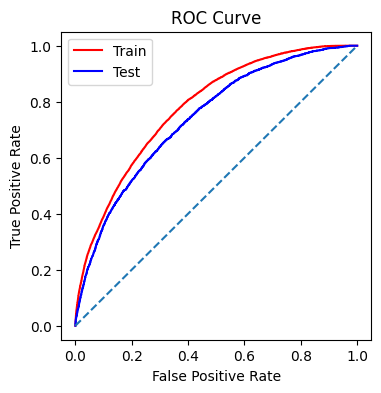

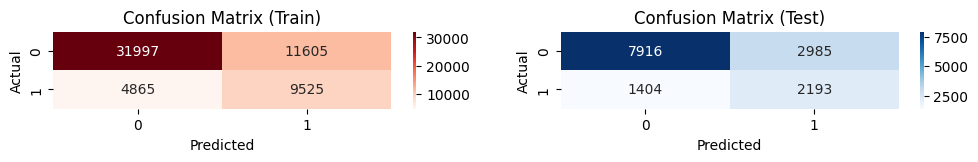

In [202]:
# Define Random Forest model
model_rf_2 = RandomForestClassifier(**best_params)

# Train the model
model_rf_2.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(model_rf_2, X_train_enc, y_train, X_test_enc, y_test, trh = 0.5)

In [203]:
# GridSearchCV for Random Forest - 1

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'random_state': [1234],
    'class_weight': ['balanced'],
    'n_jobs': [-1]    
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train_enc, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
438 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 1234}
Best ROC AUC on validation: 0.7308649164053527


Train results:
RandomForestClassifier Accuracy (Train): 0.694
RandomForestClassifier AUC (Train): 0.750
RandomForestClassifier Recall (Train): 0.640
RandomForestClassifier Specificity (Train): 0.711
RandomForestClassifier F1-score (Train): 0.509
Test results:
RandomForestClassifier Accuracy (Test): 0.685
RandomForestClassifier AUC (Test): 0.734
RandomForestClassifier Recall (Test): 0.613
RandomForestClassifier Specificity (Test): 0.709
RandomForestClassifier F1-score (Test): 0.491


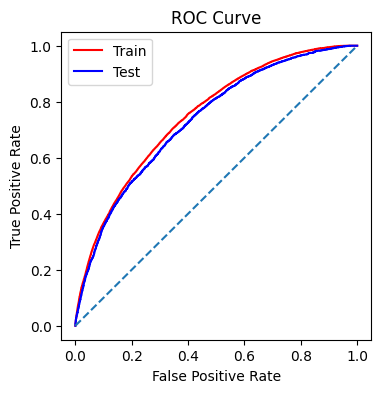

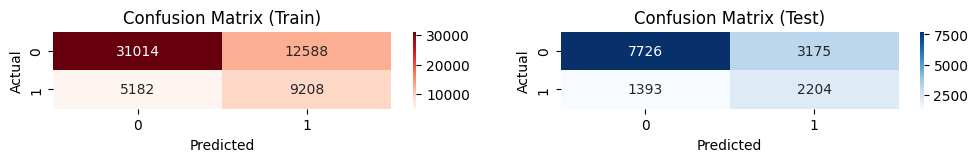

In [204]:
# Define Random Forest model
model_rf_3 = RandomForestClassifier(**best_params)

# Train the model
model_rf_3.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(model_rf_3, X_train_enc, y_train, X_test_enc, y_test, trh = 0.5)

#### Optimización de hiperparámetros con OPTUNA

In [270]:
# Optimizacion de curva ROC AUC de Random Forest con OPTUNA
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 500)  # Número de árboles
    max_depth = trial.suggest_int('max_depth', 3, 30)  # Profundidad máxima
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Mínimo de muestras para dividir nodo
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)  # Mínimo de muestras en una hoja
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])  # Función de impureza
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])  # Features por división
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])  # Muestreo con reemplazo
    #class_weight = trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None])  # Pesos de clase
    #oob_score = trial.suggest_categorical('oob_score', [True, False]) if bootstrap else False  # Evaluación OOB
    #warm_start = trial.suggest_categorical('warm_start', [True, False])  # Seguir entrenando desde modelo anterior
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0) if bootstrap else None  # Proporción de datos por árbol

    # Crear el modelo con los hiperparámetros sugeridos
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        #class_weight=class_weight,
        #oob_score=oob_score,
        #warm_start=warm_start,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1  # Usar todos los núcleos para acelerar el entrenamiento
    )

    # Validación cruzada para evitar overfitting
    auc = cross_val_score(model, X_train_enc, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Ejecutar la optimización con Optuna
pruner = optuna.pruners.MedianPruner() # Pruner para detener el entrenamiento si no mejora la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  # Maximizar AUC
study.optimize(objective, n_trials=25)  # Probará 25 combinaciones de hiperparámetros

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

[I 2025-01-31 12:01:46,320] A new study created in memory with name: no-name-63a97b3c-55e0-4a09-9625-8053b3c3bdbb


[I 2025-01-31 12:02:45,464] Trial 0 finished with value: 0.7038484708450534 and parameters: {'n_estimators': 361, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 5, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': True, 'max_samples': 0.782945121472796}. Best is trial 0 with value: 0.7038484708450534.
[I 2025-01-31 12:04:25,312] Trial 1 finished with value: 0.718435533346093 and parameters: {'n_estimators': 188, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'gini', 'max_features': 'log2', 'bootstrap': True, 'max_samples': 0.9395360609813816}. Best is trial 1 with value: 0.718435533346093.
[I 2025-01-31 12:05:37,212] Trial 2 finished with value: 0.7278428627791835 and parameters: {'n_estimators': 211, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'gini', 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.7278428627791835.
[I 2025-01-31 12:08:34,000] Trial 3 finished with value: 0

Mejores hiperparámetros: {'n_estimators': 432, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'log_loss', 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.5422306311867203}


Mejor umbral para F1: 0.263


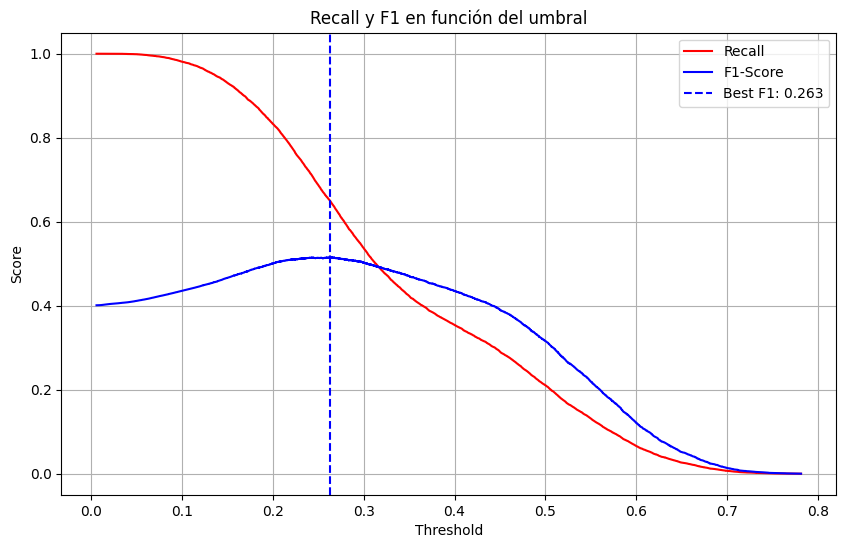

In [271]:
# Evaluación de umbral, F1 y Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train_enc, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_enc)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="blue")
plt.axvline(x=best_threshold_f1, color="yellow", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

Train results:
RandomForestClassifier Accuracy (Train): 0.676
RandomForestClassifier AUC (Train): 0.831
RandomForestClassifier Recall (Train): 0.877
RandomForestClassifier Specificity (Train): 0.609
RandomForestClassifier F1-score (Train): 0.576
Test results:
RandomForestClassifier Accuracy (Test): 0.624
RandomForestClassifier AUC (Test): 0.749
RandomForestClassifier Recall (Test): 0.780
RandomForestClassifier Specificity (Test): 0.572
RandomForestClassifier F1-score (Test): 0.510


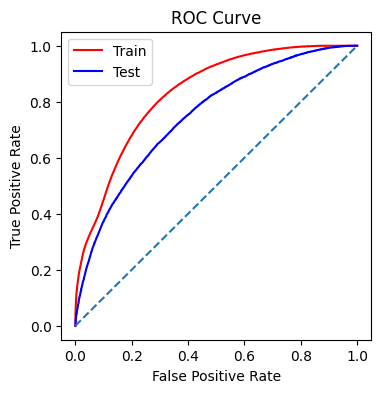

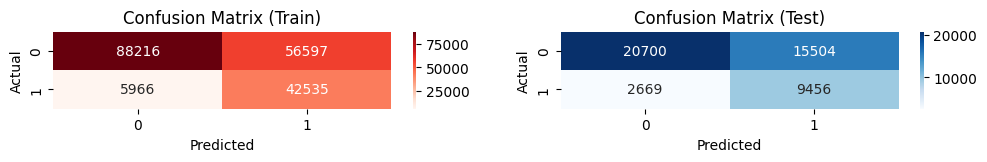

In [276]:
# calcular métricas con el umbral óptimo para 
compute_metrics(best_model, X_train_enc, y_train, X_test_enc, y_test, trh=0.22)


- Optimizando valores en función de resultados anteriores

In [279]:
# Optimizacion de curva ROC AUC de Random Forest con OPTUNA
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import optuna.visualization as vis

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 300, 600)  # Número de árboles
    max_depth = trial.suggest_int('max_depth', 10, 20)  # Profundidad máxima
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Mínimo de muestras para dividir nodo
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)  # Mínimo de muestras en una hoja
    criterion = trial.suggest_categorical('criterion', ['log_loss'])  # Función de impureza
    max_features = trial.suggest_categorical('max_features', ['sqrt'])  # Features por división
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])  # Muestreo con reemplazo
    #class_weight = trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None])  # Pesos de clase
    #oob_score = trial.suggest_categorical('oob_score', [True, False]) if bootstrap else False  # Evaluación OOB
    #warm_start = trial.suggest_categorical('warm_start', [True, False])  # Seguir entrenando desde modelo anterior
    max_samples = trial.suggest_float('max_samples', 0.3, 1.0) if bootstrap else None  # Proporción de datos por árbol

    # Crear el modelo con los hiperparámetros sugeridos
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        #class_weight=class_weight,
        #oob_score=oob_score,
        #warm_start=warm_start,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1  # Usar todos los núcleos para acelerar el entrenamiento
    )

    # Validación cruzada para evitar overfitting
    auc = cross_val_score(model, X_train_enc, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Ejecutar la optimización con Optuna
pruner = optuna.pruners.MedianPruner() # Pruner para detener el entrenamiento si no mejora la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  # Maximizar AUC
study.optimize(objective, n_trials=25)  # Probará 25 combinaciones de hiperparámetros

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

# Mostar gráficos de optimización
vis.plot_optimization_history(study)
vis.plot_param_importances(study)
vis.plot_slice(study)


[I 2025-01-31 13:24:25,974] A new study created in memory with name: no-name-c25ea466-a7b5-4f90-b7f5-eeff2853ee9b
[I 2025-01-31 13:30:13,995] Trial 0 finished with value: 0.7378382092295773 and parameters: {'n_estimators': 515, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'log_loss', 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.7378382092295773.
[I 2025-01-31 13:33:33,735] Trial 1 finished with value: 0.7418379737721063 and parameters: {'n_estimators': 394, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 3, 'criterion': 'log_loss', 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.814251461098281}. Best is trial 1 with value: 0.7418379737721063.
[I 2025-01-31 13:36:15,946] Trial 2 finished with value: 0.7346873098957711 and parameters: {'n_estimators': 484, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'log_loss', 'max_features': 'sqrt', 'bootstrap': True, 'max_samples':

Mejores hiperparámetros: {'n_estimators': 573, 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 4, 'criterion': 'log_loss', 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.4216917437367222}


In [285]:
vis.plot_param_importances(study)

In [286]:
vis.plot_optimization_history(study)

In [290]:
optuna.visualization.plot_timeline(study)

Mejor umbral para F1: 0.245


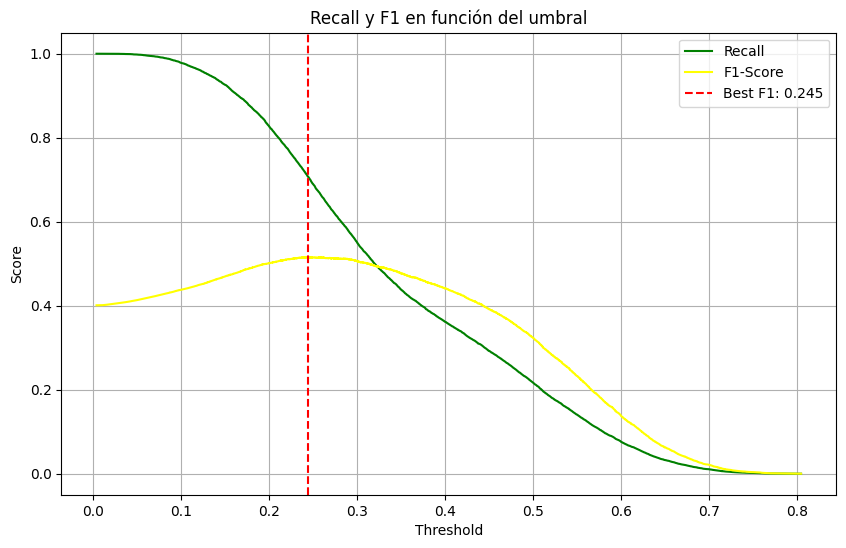

In [281]:
# Evaluación de umbral, F1 y Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train_enc, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_enc)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

Train results:
RandomForestClassifier Accuracy (Train): 0.643
RandomForestClassifier AUC (Train): 0.840
RandomForestClassifier Recall (Train): 0.923
RandomForestClassifier Specificity (Train): 0.549
RandomForestClassifier F1-score (Train): 0.565
Test results:
RandomForestClassifier Accuracy (Test): 0.587
RandomForestClassifier AUC (Test): 0.750
RandomForestClassifier Recall (Test): 0.827
RandomForestClassifier Specificity (Test): 0.507
RandomForestClassifier F1-score (Test): 0.501


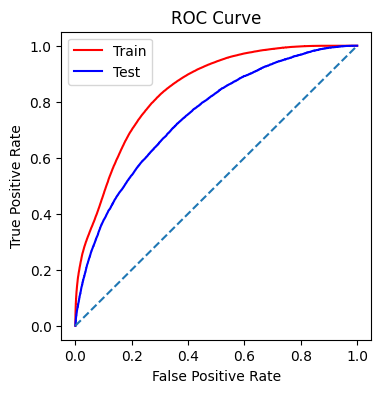

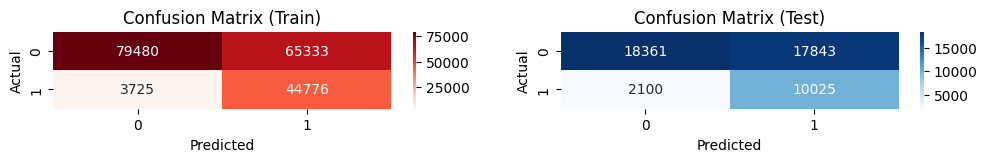

In [295]:
# calcular métricas con el umbral óptimo para el modelo
compute_metrics(best_model, X_train_enc, y_train, X_test_enc, y_test, trh=0.2)

- Probamos solo con los datos de las 15 variables más importantes

- Random Forest

In [382]:
# Optimizacion de curva ROC AUC de Random Forest con OPTUNA
# Esta vez con test data de 30%
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna 
def objective(trial):
    # 🔹 **Hiperparámetros ajustados para reducir sobreajuste**
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Reducimos la cantidad de árboles
    max_depth = trial.suggest_int('max_depth', 3, 15)  # Árboles menos profundos
    min_samples_split = trial.suggest_int('min_samples_split', 5, 20)  # Más muestras para hacer splits
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)  # Más muestras en las hojas
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])  # Eliminamos 'log_loss' para estabilidad
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5])  # Menos features por split
    bootstrap = trial.suggest_categorical('bootstrap', [True])  # Usamos solo bootstrap para estabilidad
    class_weight = trial.suggest_categorical('class_weight', ['balanced'])  # Mantenemos el balanceo de clases
    oob_score = trial.suggest_categorical('oob_score', [True, False])  # Evaluación OOB para medir overfitting
    warm_start = trial.suggest_categorical('warm_start', [False])  # Evitamos `warm_start` para consistencia
    max_samples = trial.suggest_float('max_samples', 0.6, 0.9) if bootstrap else None  # Limitamos la cantidad de datos por árbol

    # **Modelo de Random Forest con hiperparámetros optimizados**
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        oob_score=oob_score,
        warm_start=warm_start,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1  # Usar todos los núcleos para acelerar el entrenamiento
    )

    # Validación cruzada para evitar overfitting
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Ejecutar la optimización con Optuna
pruner = optuna.pruners.MedianPruner() # Pruner para detener el entrenamiento si no mejora la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  # Maximizar AUC
study.optimize(objective, n_trials=25)  # Probará 25 combinaciones de hiperparámetros

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

[I 2025-02-03 15:07:12,477] A new study created in memory with name: no-name-98a3dd9a-e100-420f-a48d-29c3471aaa56


[I 2025-02-03 15:10:58,528] Trial 0 finished with value: 0.7408405742499233 and parameters: {'n_estimators': 265, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'gini', 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': True, 'warm_start': False, 'max_samples': 0.7457666369220998}. Best is trial 0 with value: 0.7408405742499233.
[I 2025-02-03 15:13:04,652] Trial 1 finished with value: 0.7381958336197245 and parameters: {'n_estimators': 157, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 5, 'criterion': 'gini', 'max_features': 0.5, 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': False, 'warm_start': False, 'max_samples': 0.8085992016207949}. Best is trial 0 with value: 0.7408405742499233.
[I 2025-02-03 15:15:12,247] Trial 2 finished with value: 0.7365251851405425 and parameters: {'n_estimators': 162, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 10, 'criterion': 'gini', 'max_features'

Mejores hiperparámetros: {'n_estimators': 257, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 6, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': True, 'warm_start': False, 'max_samples': 0.6969037074241755}


In [383]:
vis.plot_param_importances(study)


Mejor umbral para F1: 0.477


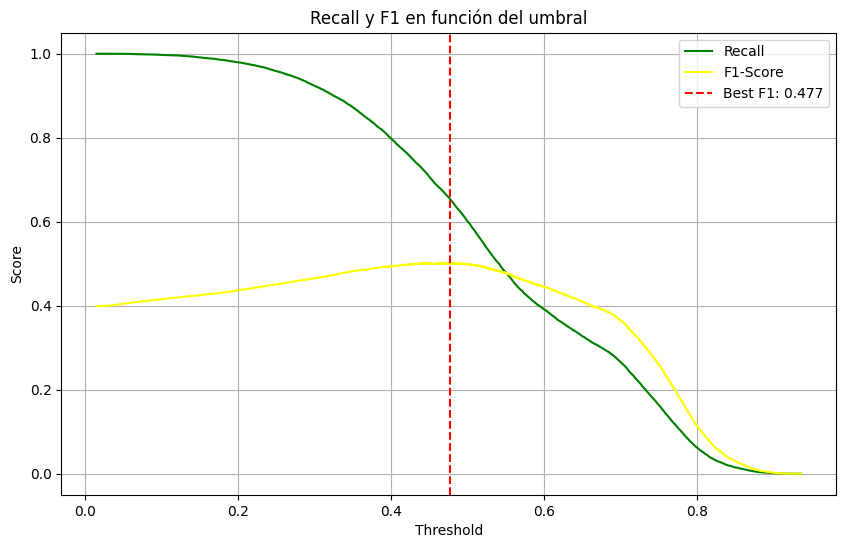

In [384]:
# Evaluación de umbral, F1 y Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

Train results:
RandomForestClassifier Accuracy (Train): 0.750
RandomForestClassifier AUC (Train): 0.849
RandomForestClassifier Recall (Train): 0.809
RandomForestClassifier Specificity (Train): 0.730
RandomForestClassifier F1-score (Train): 0.619
Test results:
RandomForestClassifier Accuracy (Test): 0.677
RandomForestClassifier AUC (Test): 0.739
RandomForestClassifier Recall (Test): 0.655
RandomForestClassifier Specificity (Test): 0.685
RandomForestClassifier F1-score (Test): 0.503


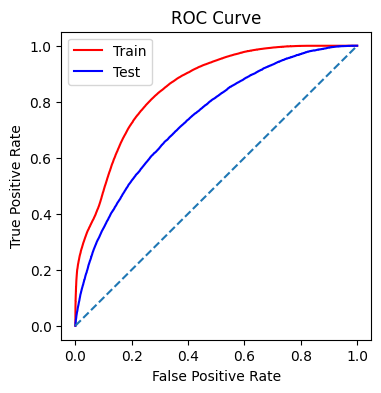

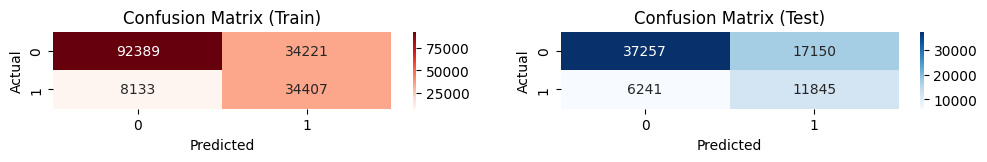

In [340]:
# calcular métricas con el umbral óptimo para el modelo
compute_metrics(best_model, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.258)

- Arbol de decisión con dataset reducido

In [341]:
# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    max_depth = trial.suggest_int('max_depth', 3, 30)  # Profundidad máxima
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Muestras mínimas para dividir nodo
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)  # Muestras mínimas en una hoja
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])  # Función de impureza
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Features por división
    splitter = trial.suggest_categorical('splitter', ['best', 'random']),  # Método para dividir los nodos
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])  # Pesos de clase

    # Crear el modelo con los hiperparámetros sugeridos
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        splitter=splitter,
        class_weight=class_weight,
        random_state=42
    )

    # Evaluación con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para evitar pruebas innecesarias
pruner = optuna.pruners.MedianPruner()  # Detiene pruebas si no mejoran la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=25)  # Ejecutar 25 pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-01 12:01:37,398] A new study created in memory with name: no-name-61e474fb-7d35-4ae1-861b-e78812dc9762
[I 2025-02-01 12:01:40,544] Trial 0 finished with value: 0.6334213097411592 and parameters: {'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'log_loss', 'max_features': 'log2', 'splitter': 'best'}. Best is trial 0 with value: 0.6334213097411592.
[I 2025-02-01 12:01:41,585] Trial 1 finished with value: 0.6838727968903913 and parameters: {'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 5, 'criterion': 'log_loss', 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 1 with value: 0.6838727968903913.
[I 2025-02-01 12:01:44,228] Trial 2 finished with value: 0.6298180669460656 and parameters: {'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}. Best is trial 1 with value: 0.6838727968903913.
[I 2025-02-01 12:01:45,915] Trial 3 finished with value: 0.

Mejores hiperparámetros: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2, 'criterion': 'gini', 'max_features': None, 'splitter': 'best'}


In [345]:
vis.plot_param_importances(study)

In [385]:
# Evaluación de umbral, F1 y Recall con dataset reducido


# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = DecisionTreeClassifier(**study.best_params, random_state=42)
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'n_estimators'

Train results:
DecisionTreeClassifier Accuracy (Train): 0.629
DecisionTreeClassifier AUC (Train): 0.734
DecisionTreeClassifier Recall (Train): 0.733
DecisionTreeClassifier Specificity (Train): 0.594
DecisionTreeClassifier F1-score (Train): 0.499
Test results:
DecisionTreeClassifier Accuracy (Test): 0.625
DecisionTreeClassifier AUC (Test): 0.725
DecisionTreeClassifier Recall (Test): 0.722
DecisionTreeClassifier Specificity (Test): 0.593
DecisionTreeClassifier F1-score (Test): 0.490


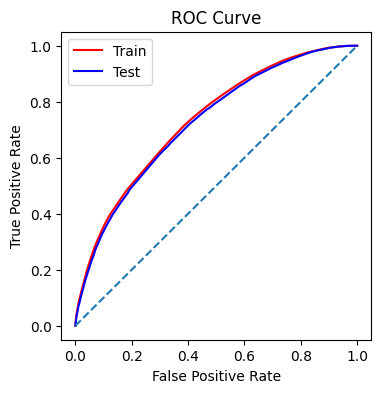

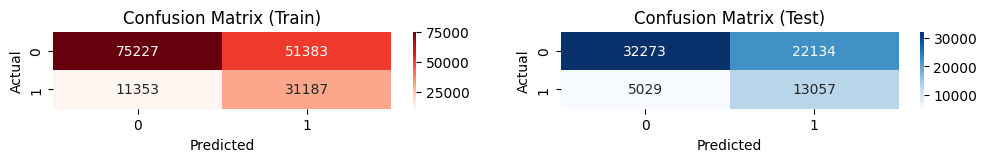

In [344]:
# calcular métricas con el umbral óptimo para el modelo
compute_metrics(best_model, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.231)

- Se modifica rango de hyperparámetros en función del gráfico de importancia

In [357]:
# Definir la función objetivo para Optuna -  ARBOL DE DECISION
def objective(trial):
    # Sugerir hiperparámetros
    max_depth = trial.suggest_int('max_depth', 3, 50)  # Profundidad máxima
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Muestras mínimas para dividir nodo
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)  # Muestras mínimas en una hoja
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])  # Función de impureza
    max_features = trial.suggest_float('max_features', 0.1, 1)  # Features por división
    splitter = trial.suggest_categorical('splitter', ['random', 'best'])  # Método para dividir los nodos
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])  # Pesos de clase

    # Crear el modelo con los hiperparámetros sugeridos
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        splitter=splitter,
        class_weight=class_weight,
        random_state=42
    )

    # Evaluación con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para evitar pruebas innecesarias
pruner = optuna.pruners.MedianPruner()  # Detiene pruebas si no mejoran la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=1000)  # Ejecutar 1000 pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-01 12:31:51,992] A new study created in memory with name: no-name-8d58291a-49fb-44d8-8dc8-b78d30aaa90e
[I 2025-02-01 12:31:57,594] Trial 0 finished with value: 0.6359451115889683 and parameters: {'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 5, 'criterion': 'log_loss', 'max_features': 0.5895437193167995, 'splitter': 'best', 'class_weight': None}. Best is trial 0 with value: 0.6359451115889683.
[I 2025-02-01 12:31:58,828] Trial 1 finished with value: 0.6826332177705362 and parameters: {'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'log_loss', 'max_features': 0.17534902347554973, 'splitter': 'best', 'class_weight': None}. Best is trial 1 with value: 0.6826332177705362.
[I 2025-02-01 12:32:01,261] Trial 2 finished with value: 0.6244306166848379 and parameters: {'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 3, 'criterion': 'gini', 'max_features': 0.2620181564468773, 'splitter': 'best', 'class_weight': None}. Best is tr

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5, 'criterion': 'entropy', 'max_features': 0.6128430903240075, 'splitter': 'best', 'class_weight': 'balanced'}


- ADABOOST

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Train results:
AdaBoostClassifier Accuracy (Train): 0.766
AdaBoostClassifier AUC (Train): 0.734
AdaBoostClassifier Recall (Train): 0.245
AdaBoostClassifier Specificity (Train): 0.941
AdaBoostClassifier F1-score (Train): 0.345
Test results:
AdaBoostClassifier Accuracy (Test): 0.766
AdaBoostClassifier AUC (Test): 0.728
AdaBoostClassifier Recall (Test): 0.241
AdaBoostClassifier Specificity (Test): 0.941
AdaBoostClassifier F1-score (Test): 0.339


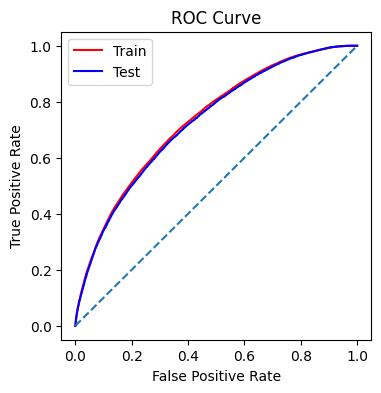

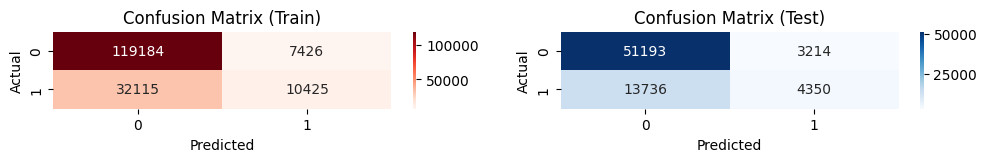

In [350]:
# Use AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

# Define the model
model_ab_1 = AdaBoostClassifier(random_state=42, n_estimators=200, learning_rate=0.6)

# Train the model
model_ab_1.fit(X_train_reducido, y_train)

# Compute metrics
compute_metrics(model_ab_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.5)

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Mejor umbral para F1: 0.498


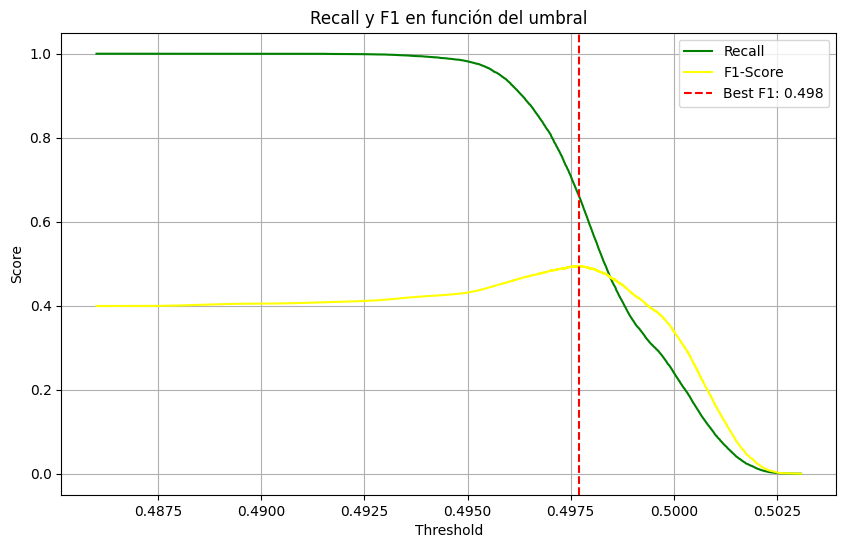

In [352]:
# Evaluación de umbral, F1 y Recall con dataset reducido


# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_ab_1
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

Train results:
AdaBoostClassifier Accuracy (Train): 0.588
AdaBoostClassifier AUC (Train): 0.734
AdaBoostClassifier Recall (Train): 0.794
AdaBoostClassifier Specificity (Train): 0.518
AdaBoostClassifier F1-score (Train): 0.492
Test results:
AdaBoostClassifier Accuracy (Test): 0.583
AdaBoostClassifier AUC (Test): 0.728
AdaBoostClassifier Recall (Test): 0.787
AdaBoostClassifier Specificity (Test): 0.516
AdaBoostClassifier F1-score (Test): 0.485


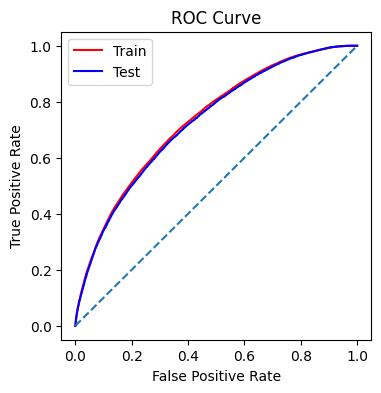

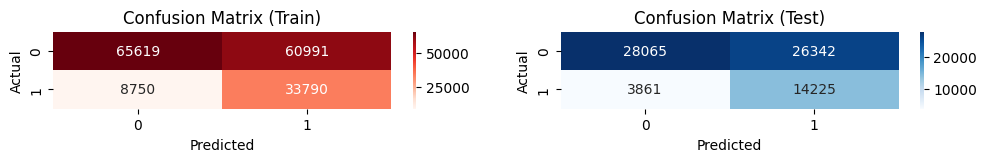

In [367]:
compute_metrics(model_ab_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.49712)

#### XGBOOST

Train results:
XGBClassifier Accuracy (Train): 0.586
XGBClassifier AUC (Train): 0.742
XGBClassifier Recall (Train): 0.814
XGBClassifier Specificity (Train): 0.510
XGBClassifier F1-score (Train): 0.497
Test results:
XGBClassifier Accuracy (Test): 0.581
XGBClassifier AUC (Test): 0.733
XGBClassifier Recall (Test): 0.803
XGBClassifier Specificity (Test): 0.508
XGBClassifier F1-score (Test): 0.489


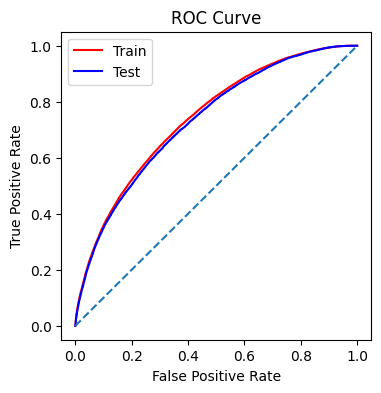

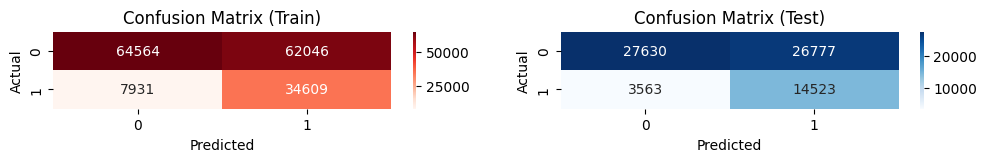

In [368]:
# XGBoost model

from xgboost import XGBClassifier

# Define the model
model_xgb_1 = XGBClassifier(random_state=1234, booster='gbtree', n_estimators=50, learning_rate=0.3, max_depth=3, subsample=0.9, colsample_bytree=0.8, gamma=0.1)

# Train the model
model_xgb_1.fit(X_train_reducido, y_train)

# Compute metrics
compute_metrics(model_xgb_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.2)

In [376]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 800)  # Más árboles para mejorar generalización
    max_depth = trial.suggest_int('max_depth', 3, 10)  # Evita árboles demasiado profundos (overfitting)
    learning_rate = trial.suggest_float('learning_rate', 0.005, 0.3, log=True)  # Ajuste fino con log-scale
    subsample = trial.suggest_float('subsample', 0.6, 0.9)  # Ayuda a evitar overfitting
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 0.9)  # Reduce correlación entre árboles
    gamma = trial.suggest_float('gamma', 0, 5)  # Controla divisiones en árboles
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)  # Controla tamaño mínimo de hojas
    reg_alpha = trial.suggest_float('reg_alpha', 0, 5)  # Regularización L1
    reg_lambda = trial.suggest_float('reg_lambda', 0.5, 5)  # Regularización L2
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 5)  # Compensa el desbalance de clases


    # Crear el modelo XGBoost con los hiperparámetros sugeridos
    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        n_jobs=-1  # Usa todos los núcleos disponibles
    )

    # Evaluar con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para detener pruebas innecesarias
pruner = optuna.pruners.MedianPruner()  # Detiene ensayos si no mejoran la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=500)  # Ejecutar pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-02 19:59:35,722] A new study created in memory with name: no-name-3b5054ec-2271-4a28-a34d-7f7f68d1fe9a
[I 2025-02-02 20:00:12,190] Trial 0 finished with value: 0.7413512278728215 and parameters: {'n_estimators': 418, 'max_depth': 3, 'learning_rate': 0.10415147178839217, 'subsample': 0.6701773647430386, 'colsample_bytree': 0.6470340868762816, 'gamma': 4.997272452108016, 'min_child_weight': 17, 'reg_alpha': 1.4843169645266763, 'reg_lambda': 4.027439186839175, 'scale_pos_weight': 1.7044519344797826}. Best is trial 0 with value: 0.7413512278728215.
[I 2025-02-02 20:00:58,940] Trial 1 finished with value: 0.7369590859202211 and parameters: {'n_estimators': 360, 'max_depth': 7, 'learning_rate': 0.16601551525322622, 'subsample': 0.6569885654626753, 'colsample_bytree': 0.7323119791370767, 'gamma': 2.4122614079171183, 'min_child_weight': 20, 'reg_alpha': 2.755546952976437, 'reg_lambda': 3.2812981979495452, 'scale_pos_weight': 2.6308829076260754}. Best is trial 0 with value: 0.7413512

Mejores hiperparámetros: {'n_estimators': 765, 'max_depth': 10, 'learning_rate': 0.016225672883332102, 'subsample': 0.88417889802558, 'colsample_bytree': 0.4396834087083362, 'gamma': 4.095999096829266, 'min_child_weight': 6, 'reg_alpha': 2.2110907198819048, 'reg_lambda': 3.2677523361274523, 'scale_pos_weight': 2.5873849937127678}


Mejor umbral para F1: 0.469


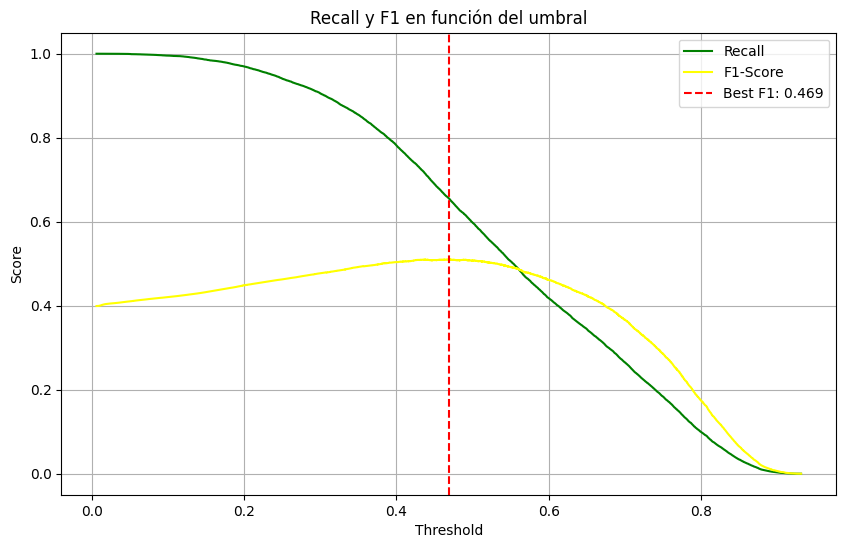

In [377]:
# Evaluación de umbral, F1 y Recall con dataset reducido

best_model_xgb_1 = xgb.XGBClassifier(**study.best_params, random_state=42, n_jobs=-1)

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = best_model_xgb_1
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

Train results:
XGBClassifier Accuracy (Train): 0.719
XGBClassifier AUC (Train): 0.798
XGBClassifier Recall (Train): 0.732
XGBClassifier Specificity (Train): 0.714
XGBClassifier F1-score (Train): 0.567
Test results:
XGBClassifier Accuracy (Test): 0.685
XGBClassifier AUC (Test): 0.747
XGBClassifier Recall (Test): 0.656
XGBClassifier Specificity (Test): 0.695
XGBClassifier F1-score (Test): 0.510


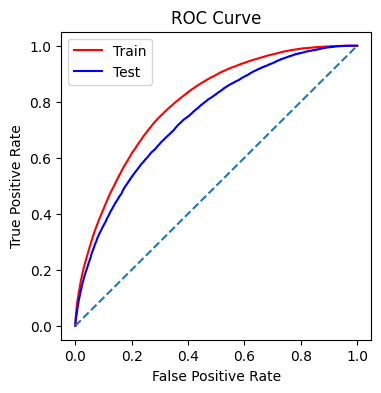

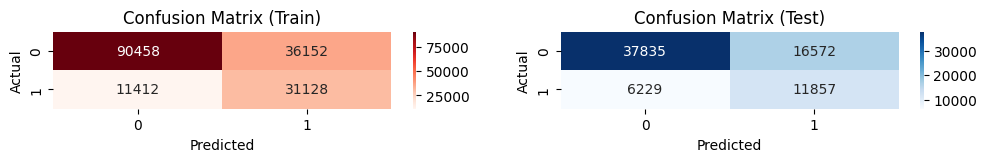

In [386]:
# Metricas del modelo
compute_metrics(best_model_xgb_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.469)